In [39]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
print('importing Complete')


importing Complete


In [2]:
#Lets read file of training dataset
titanic_train=pd.read_csv('/content/drive/My Drive/Python/titanic/train.csv')
#Drop the cabin column as it has too many Nan values

display(titanic_train.head(15))
#Lets find out the info of the dataset
print(titanic_train.info())
print(titanic_train.shape)
print(titanic_train.describe())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(891, 12)
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008  

In [3]:
#Lets Find Out Total No. of passengers in training set
print('Total No. of passengers on the ship.:', titanic_train.PassengerId.count())
print('Total No. of passengers survived on the ship.:',titanic_train.Survived.sum())

Total No. of passengers on the ship.: 891
Total No. of passengers survived on the ship.: 342


Survived and died people after Normalizing.:  0    0.616162
1    0.383838
Name: Survived, dtype: float64


(0.0, 1.0)

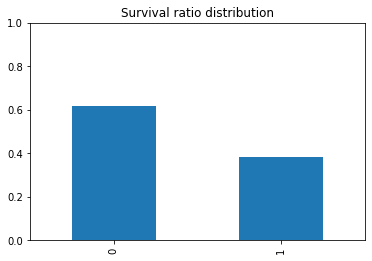

In [4]:
k=titanic_train.Survived.value_counts(normalize=True)
print('Survived and died people after Normalizing.: ',k)
k.plot(kind='bar',title='Survival ratio distribution').set_ylim(0.0,1.0)

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

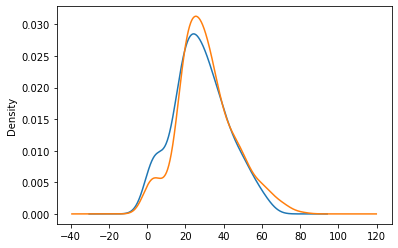

In [5]:
titanic_train.groupby('Sex').Age.plot(kind='kde')

age_range
child    AxesSubplot(0.125,0.125;0.775x0.755)
adult    AxesSubplot(0.125,0.125;0.775x0.755)
old      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

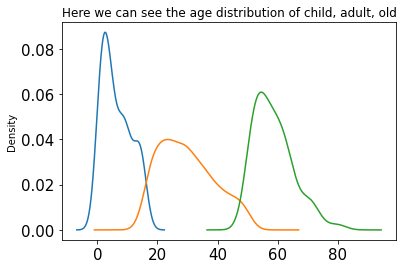

In [6]:
#Here we can see that the age of many passengers is missing so we will interpolate them to avoid the loosing of data.
titanic_train['Age'].interpolate(method='linear', limit_direction='forward', axis=0)
#We will group the ages into 3 categories of childs, below 19 as child, 19-40 adults, 40+ as old.
titanic_train['age_range']=pd.cut(titanic_train['Age'],[0,15,50,100], labels=['child','adult','old'])
titanic_train.groupby('age_range').Age.plot(kind='kde',title='Here we can see the age distribution of child, adult, old',fontsize=15 )


In [7]:
#Now we will differentiate the data for Survival rate taking different aspects in account.
#Hence we can see the 61.62% of population is died and only 38.39% of population is survived.
#First We will take the Sex into the considertion.
survival_by_sex=titanic_train.groupby('Sex')['Survived'].mean()
print(survival_by_sex)
print('Here we can see the survival rate of females are far more greater then males')
#Second We will take the Pclass into the considertion.
survival_by_Pclass=titanic_train.groupby('Pclass')['Survived'].mean()
print(survival_by_Pclass)
print('Here we can see there is an order of survival class wise')
#Third We will take the Age into the considertion.
survival_by_age=titanic_train.groupby('age_range')['Survived'].mean()
print(survival_by_age)
print('Here we can see childs are given more priority and olds are given the least')


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Here we can see the survival rate of females are far more greater then males
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
Here we can see there is an order of survival class wise
age_range
child    0.590361
adult    0.386243
old      0.343750
Name: Survived, dtype: float64
Here we can see childs are given more priority and olds are given the least


Hence we can clearly visualize all three scenarios in the bar graphs


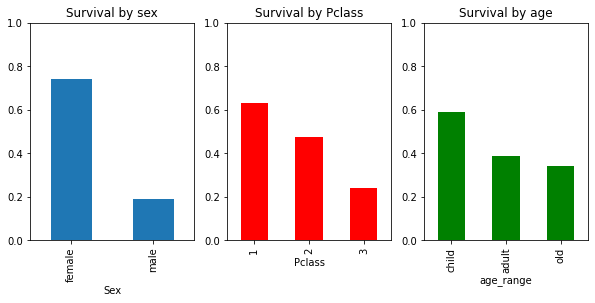

In [8]:
#Here we will plot the whole three scenarios to observe a better picture of Survival rate of people.
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(10,4))
ax= survival_by_sex.plot(ax=axis1, kind='bar',title='Survival by sex')
ax.set_ylim(0.0,1.0)
ax= survival_by_Pclass.plot(ax= axis2, kind='bar',title='Survival by Pclass',color='red')
ax.set_ylim(0.0,1.0)
ax= survival_by_age.plot(ax=axis3, kind='bar', title='Survival by age',color='green')
ax.set_ylim(0.0,1.0)
print('Hence we can clearly visualize all three scenarios in the bar graphs')

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
As we can see there is some relationship bw fare and survival rate max fare more people survived


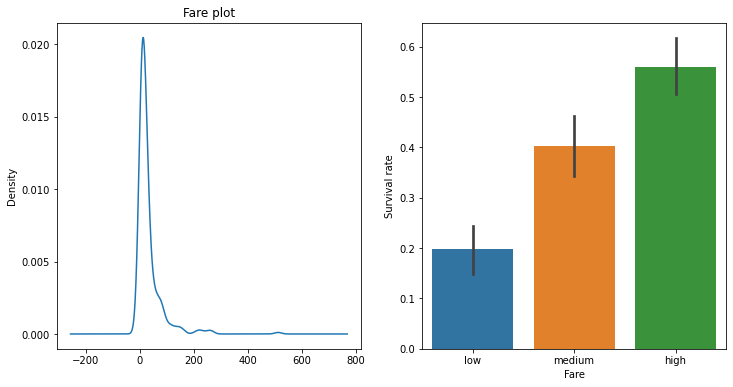

In [9]:
# Here we have another columns to compute fare and embarked we will check if survived number depends on it or not.
t_fare=titanic_train.Fare.describe()
print(t_fare)
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,6))
ax=titanic_train.Fare.plot(ax=axis1, kind='kde',title='Fare plot')
fare_range = pd.qcut(titanic_train['Fare'], q=3, labels=['low', 'medium', 'high'])
sns.barplot(x=fare_range, y=titanic_train.Survived, ax=axis2).set_ylabel('Survival rate')
print('As we can see there is some relationship bw fare and survival rate max fare more people survived')

In [10]:
# Now we will Covert the Embarked columnn into numeric data for easy processing with the help of label encoder.
titanic_train['Embarked']=titanic_train['Embarked'].astype('S')
le = LabelEncoder() 
titanic_train['Embarked']= le.fit_transform(titanic_train['Embarked'])
titanic_train['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

Embarked
0    0.553571
1    0.389610
2    0.336957
3    1.000000
Name: Survived, dtype: float64


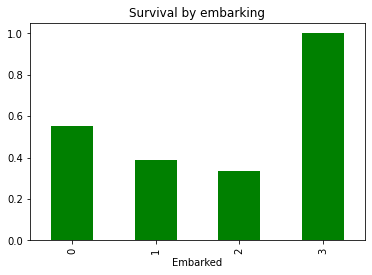

In [11]:
#We will see the relation of Embarking with the survival Class.
survival_by_embarking=titanic_train.groupby('Embarked')['Survived'].mean()
print(survival_by_embarking)
survival_by_embarking.plot(kind='bar', title='Survival by embarking',color='green')

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64
Hence we can see there is not any pattern in parch but still it gives some data so will consider it while applying ML modelling


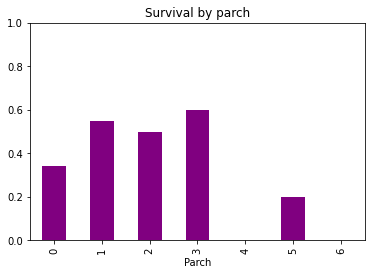

In [12]:
#We will check whether the survival data depends on the Parch Column or not.
survival_by_parch= titanic_train.groupby('Parch')['Survived'].mean()
print(survival_by_parch)
survival_by_parch.plot(kind='bar', title='Survival by parch',color='purple').set_ylim(0.0,1.0)
print('Hence we can see there is not any pattern in parch but still it gives some data so will consider it while applying ML modelling')

In [13]:
#As we can see There is too much data is missing from Age and cabin column and from Embarked column only two rows are missing
#We will drop the NaN rows from Age and Embarked column
#We will drop some not important columns including cabin.
titanic_train_f=titanic_train.drop(['Name','age_range','PassengerId','SibSp','Ticket','Cabin'],axis=1)
titanic_train_final1=titanic_train_f.dropna()
titanic_train_final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   Parch     714 non-null    int64  
 5   Fare      714 non-null    float64
 6   Embarked  714 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [14]:
#Now we have to encode Sex column for the processing.
titanic_train_final1['Sex']=titanic_train_final1['Sex'].astype('S')
le = LabelEncoder() 
titanic_train_final1['Sex']= le.fit_transform(titanic_train_final1['Sex'])
titanic_train_final1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,3,1,22.0,0,7.2500,2
1,1,1,0,38.0,0,71.2833,0
2,1,3,0,26.0,0,7.9250,2
3,1,1,0,35.0,0,53.1000,2
4,0,3,1,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
885,0,3,0,39.0,5,29.1250,1
886,0,2,1,27.0,0,13.0000,2
887,1,1,0,19.0,0,30.0000,2
889,1,1,1,26.0,0,30.0000,0


In [15]:
#Here We have to Check Variance of each column
print(titanic_train_final1.var())
print('As we can See there is too much variance in the Age and Fare Column')

Survived       0.241533
Pclass         0.702663
Sex            0.232247
Age          211.019125
Parch          0.728103
Fare        2800.413100
Embarked       0.610715
dtype: float64
As we can See there is too much variance in the Age and Fare Column


In [33]:
# Now we have to make the Survived as labelled data 
# We do not have the need to apply the train_test_split as the dataset is already in training form
# We will apply Normalization as well.
y_train=titanic_train_final1.Survived
X=titanic_train_final1.drop(['Survived','Parch'], axis=1)
X_train=preprocessing.normalize(X)
X_train.var()

0.12031680206167668

In [17]:
#Here we will read the test Data and extract the info and shape
titanic_test=pd.read_csv('/content/drive/My Drive/Python/titanic/test.csv')
display(titanic_test.head(15))
titanic_test.info()
titanic_test.shape

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


(418, 11)

In [18]:
titanic_gender = pd.read_csv('/content/drive/My Drive/Python/titanic/gender_submission.csv')
display(titanic_gender.head(15))
titanic_gender.shape

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


(418, 2)

In [19]:
#Here we will concatenate two datasets to get our labelled feature so that we can test our accuracy
titanic_test = pd.concat([titanic_test,titanic_gender ], axis=1, join='inner')
titanic_test.shape
titanic_test = titanic_test.loc[:,~titanic_test.columns.duplicated()]
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [20]:
#We have to drop some columns for applying the ML algorithms on it.
titanic_test_f=titanic_test.drop(['Name','PassengerId','SibSp','Ticket','Cabin'],axis=1)
titanic_test_final=titanic_test_f.dropna()
titanic_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 0 to 415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    331 non-null    int64  
 1   Sex       331 non-null    object 
 2   Age       331 non-null    float64
 3   Parch     331 non-null    int64  
 4   Fare      331 non-null    float64
 5   Embarked  331 non-null    object 
 6   Survived  331 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 20.7+ KB


In [21]:
#Here We have to encode the Sex and Embarked column for ML modelling
titanic_test_final['Sex']=titanic_test_final['Sex'].astype('S')
le = LabelEncoder() 
titanic_test_final['Sex']= le.fit_transform(titanic_test_final['Sex'])
titanic_test_final['Embarked']=titanic_test_final['Embarked'].astype('S')
le = LabelEncoder() 
titanic_test_final['Embarked']= le.fit_transform(titanic_test_final['Embarked'])
titanic_test_final

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Pclass,Sex,Age,Parch,Fare,Embarked,Survived
0,3,1,34.5,0,7.8292,1,0
1,3,0,47.0,0,7.0000,2,1
2,2,1,62.0,0,9.6875,1,0
3,3,1,27.0,0,8.6625,2,0
4,3,0,22.0,1,12.2875,2,1
...,...,...,...,...,...,...,...
409,3,0,3.0,1,13.7750,2,1
411,1,0,37.0,0,90.0000,1,1
412,3,0,28.0,0,7.7750,2,1
414,1,0,39.0,0,108.9000,0,1


In [22]:
#Here we will check the variance 
print(titanic_test_final.var())
print('As we can See there is too much variance in the Age and Fare Column')

Pclass         0.716140
Sex            0.237188
Age          198.938968
Parch          0.658665
Fare        3748.936342
Embarked       0.743880
Survived       0.237188
dtype: float64
As we can See there is too much variance in the Age and Fare Column


In [32]:
#Here we will do some required preprocessing
y_test=titanic_test_final.Survived
X_test=titanic_test_final.drop(['Survived','Parch'], axis=1)
X_N_test=preprocessing.normalize(X_test)
X_N_test.var()

0.11954376609707497

In [48]:
#Now we will apply different models of ML 
#applying SVM
#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0]


In [49]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

rsqure_score = clf.score(X_train,y_train)
print('R^2: {}'.format(rsqure_score))

Accuracy: 0.7009063444108762
R^2: 0.7030812324929971


In [36]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8333333333333334
Recall: 0.2755905511811024


In [38]:
#Create a Gaussian Classifier
clf1=RandomForestClassifier(n_estimators=100,random_state=42, max_depth=5)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train,y_train)

y_pred1=clf1.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

rsqure_score = clf.score(X_train,y_train)
print('R^2: {}'.format(rsqure_score))

Accuracy: 0.3867069486404834
R^2: 0.7030812324929971
